# Default payment by different education levels
## 1. Introduction 
* According to an article published on Investopedia by James Chen, default payment is generally defined as a failure for borrowers to make required repayments on a debt for businesses, individuals or lenders in general. Default payment may severely impact different aspects in our financial situation in the future such as credit score and the ability to borrow money in the future. It is also argued that default payment is also linked with education level. Based on a research study report by Aalto University in Finland, researchers argued that default payments are more prevalent among those who have a lower educational background. 
* In this research project, we will be assessing whether the claim above is true by performing hypothesis testing on the `default of credit card clients.xls` dataset where information was based on cases of customer’s credit card in Taiwan. Data was collected by the Department of Information Management at Chung Hua University and the Department of Civil Engineering at Tangkam University both located in Taiwan. Our goal for this project is to examine whether there is a difference in the proportion of people with a university education background who have a default payment on their credit cards and the proportion of those who graduated from high school experiencing credit card’s default payment. The variables being studied are `EDUCATION` and `default payment next month`. 

## 2. Preliminary Results:
### Packages installation and data loading 
* First, we began by loading some of the necessary packages to perform data analysis later on.

In [17]:
library(tidyverse)
library(readxl)
install.packages("rio")
library(rio)
install.packages("infer")
library(infer)
install.packages("reshape2")
library(reshape2)


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




* After installing packages, we began loading our data into R. In the code cell below, we used the URL link that leads directly to the location of the data set and import it. 

In [4]:
#loading data
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
credit_card_data <- rio::import(file = url, skip =1)

# url <- "https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients?fbclid=IwAR3zj19Vq3zUk-QZaKzZDGcghVgblSfERm7w8v76w8BzqHQd3PBthNleueI"
# credit_card_data <- read_excel("default_credit_cards.xlsx")

 head(credit_card_data)
nrow(credit_card_data)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,⋯,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,20000,2,2,1,24,2,2,-1,-1,⋯,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,⋯,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,⋯,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,⋯,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,⋯,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,⋯,19394,19619,20024,2500,1815,657,1000,1000,800,0


[1] 30000

### Data cleaning and wrangling
* In this part, we perform data cleaning by only choosing the variables of interest in our research and decode their values based on the explanation provided by the website. As mentioned above, we will be choosing two variables: `EDUCATION` and `default paymnt next month` for our research. Because we are only interested in individuals with high school or university education, we will also be filtering the `EDUCATION` variable to contain either the two groups. Since the values of these two qualitative variables are coded as numbers, we decided to replace it with different values according to the explanation on the UCI website. We believe this step helps the audience navigate the dataset more easily. 

In [10]:
#cleaning data
credit_card_clean <- credit_card_data %>%
                     mutate(education_level=as.character(`EDUCATION`)) %>%
                     mutate(default=as.character(`default payment next month`)) %>%
                     select(education_level, default) %>% 
                     mutate(education_level = replace(education_level, education_level == "2", "University"),
                            default = replace(default, default== "1", "Yes")) %>%
                     mutate(education_level = replace(education_level, education_level == "3", "High School"),
                            default = replace(default, default== "0", "No"))%>%
                    filter(education_level == 'University' | education_level == 'High School')%>%
mutate(education_level = as_factor(education_level),
       default = as_factor(default))
head(credit_card_clean)


,education_level,default
,<fct>,<fct>
1,University,Yes
2,University,Yes
3,University,No
4,University,No
5,University,No
6,University,No


### Estimate our parameters and plotting distribution:
In this part, we begin by summarising our data to figure out the number of individuals with default credit card payment modes based on their education level. Then, we attempt to create a bar chart to a sense of how our sample distribution looks like. 

`summarise()` has grouped output by 'education_level'. You can override using
the `.groups` argument.


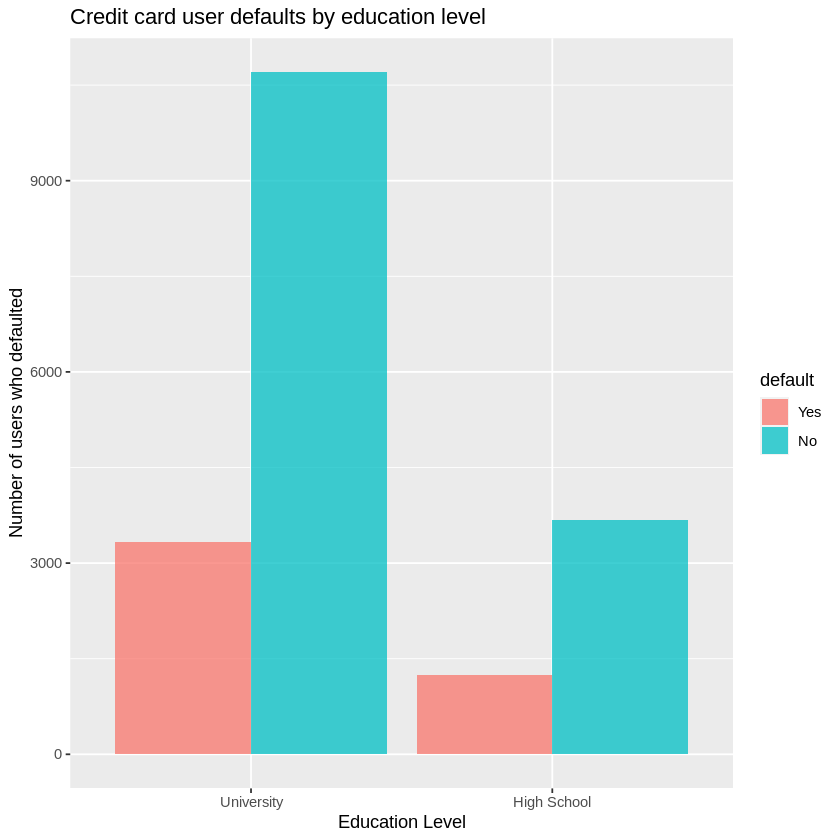

In [11]:
credit_card_count <- credit_card_clean %>%
                        group_by(education_level, default)%>%
                        summarise(count=n()) 

credit_card_plot <- credit_card_count %>%
                    ggplot(aes(x=education_level, y=count, fill=default))+
                    geom_bar(stat = "identity", position = position_dodge(), alpha = 0.75)+
                    ggtitle("Credit card user defaults by education level") +
                    labs(x="Education Level", y="Number of users who defaulted")

credit_card_plot

* One thing to notice is that in our research, we are treating people with `High School` educational background and those with `University` educational background as two independent samples. In the code below, we have calculated the proportion of individuals with high school education levels  with default credit card and proportion of people with university education levels  with default credit card.  

In [20]:
credit_card_matrix <- credit_card_count %>%
                        dcast(education_level~default, value.var="count") %>%
                        mutate(default = Yes/(Yes+No), no_default = No / (Yes + No))%>%
                        select(education_level, default, no_default)
credit_card_matrix

education_level,default,no_default
<fct>,<dbl>,<dbl>
University,0.2373485,0.7626515
High School,0.2515762,0.7484238


In [21]:
diff <- credit_card_matrix$default[1] - credit_card_matrix$default[2]%>%
as_tibble()
diff

value
<dbl>
-0.01422763


## 3. Methods: Plan 
* The data collected offers a comprehensive overview of 23 variables based on whether they have default payments. With these variables we are able to study whether these variables are correlated with a person having default payments. For this study, we will determine whether education level has an effect on the likelihood of default, specifically between high school graduates and university graduates. The distinct categories that expressed in the data allow us to clearly see the difference of each group within the sample. 
* Our hypotheses will be: $H_0: p_1 - p_2 = 0$ and $H_1: p_1 - p_2 \neq 0$ (we are treating groups of high school education level and university education level as two independent samples) . Looking at the observed difference we calculated above, we are likely to reject our $H_0$ in favor of $H_1$. However, we still need to make sure that our finding is statistically significant. Therefore, we will perform a difference of proportions hypothesis test. We can then create a bootstrap distribution and calculate confidence intervals for the true mean difference between the two variables.
* Results of the report Given that university graduates generally make more money than high school graduates, one may expect the default rate for high school graduates to be greater than university graduates; however, the debt that money university students accumulate during their studies can also put them at risk of falling behind on debt payments. The results of this report may help others determine the value of taking on debt in order to continue into post-secondary education. This report may help to answer questions about higher education and the implications it can have on future careers and debt.
